In [1]:
# source https://www.tensorflow.org/text/tutorials/word2vec
import pandas as pd
import os

data = pd.read_csv(os.path.join('../data/clean/', 'X_train.csv'), index_col=0)
target = pd.read_csv(os.path.join('../data/clean/', 'Y_train.csv'), index_col=0)

df = target.join(data)

In [2]:
# tokenisation
import Rakuten_tokenize as rkt
df['lang_translated'] = 'fr'
df['token'] = rkt.Rakuten_txt_tokenize(df.designation_translated, df.lang_translated, method='nltk')

[nltk_data] Downloading package punkt to /home/thibaud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thibaud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/thibaud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn.model_selection import train_test_split

features = df.token
target = df.prdtypecode
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)



In [4]:
import skipgram_transformer as sgt

w2v_model = sgt.SkipGramTransformer()
X_train_vect = w2v_model.fit_transform(X_train)
X_test_vect = w2v_model.transform(X_test)



In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=321)
rf.fit(X_train_vect, y_train)

import Rakuten_benchmark as bench
import importlib
importlib.reload(bench)

y_pred_rf = rf.predict(X_test_vect)
b = bench.Benchmark('bench.csv')
b.add_results('RF stratified on designation', 'RF','', y_test, y_pred_rf)
b.save()

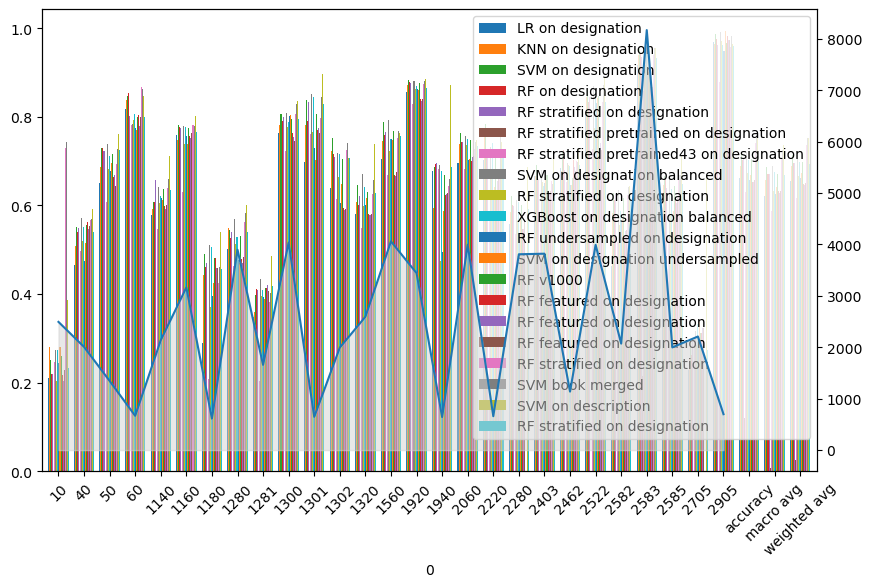

In [6]:
import Rakuten_benchmark as bench
import importlib
importlib.reload(bench)
bench.Benchmark('bench.csv').show_report(y_train)

In [7]:
from sklearn import svm
from sklearn import model_selection
csvm=svm.SVC()
parametres = {'C':[0.01,0.1,1,10,100,1000], 'kernel':['rbf']}
grid_svm = model_selection.GridSearchCV(estimator=csvm, param_grid=parametres, n_jobs=-1)
grille = grid_svm.fit(X_train_vect,y_train)
print(grid_svm.best_params_)

import Rakuten_benchmark as bench
import importlib
importlib.reload(bench)

y_pred_svm = grid_svm.predict(X_test_vect)
b = bench.Benchmark('bench.csv')
b.add_results('SVM on designation balanced', 'SVM',grid_svm.best_params_, y_test, y_pred_svm)
b.save()

KeyboardInterrupt: 

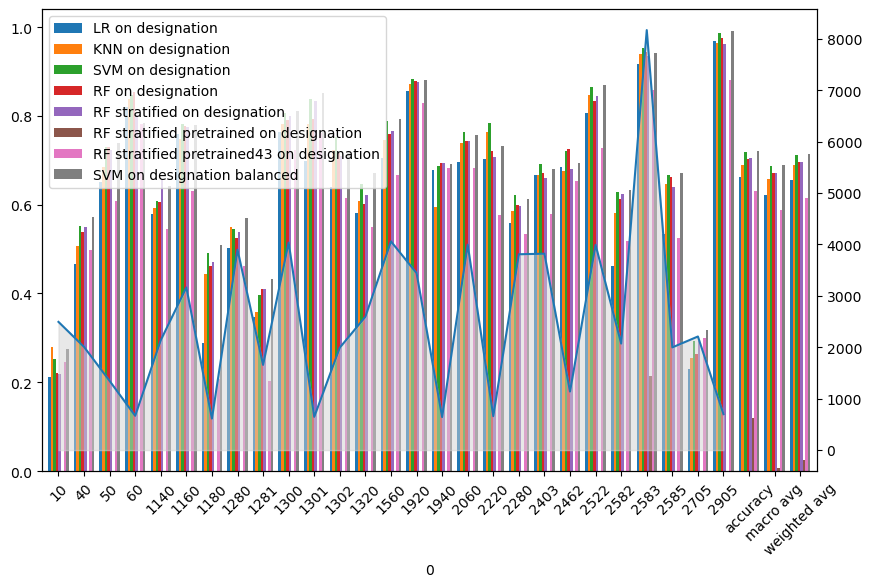

In [10]:
bench.Benchmark('bench.csv').show_report(y_train)